In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [3]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Calculate Sepal Area
iris_df['sepal area'] = iris_df['sepal length (cm)'] * iris_df['sepal width (cm)']

# Display the updated DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,sepal area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


In [5]:
# Classify Sepal Area
def classify_sepal_area(area):
    if area < 15:
        return 'Small'
    elif 15 <= area <= 25:
        return 'Medium'
    else:
        return 'Large'

iris_df['sepal area category'] = iris_df['sepal area'].apply(classify_sepal_area)

# Display the updated DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,sepal area,sepal area category
0,5.1,3.5,1.4,0.2,setosa,17.85,Medium
1,4.9,3.0,1.4,0.2,setosa,14.70,Small
2,4.7,3.2,1.3,0.2,setosa,15.04,Medium
3,4.6,3.1,1.5,0.2,setosa,14.26,Small
4,5.0,3.6,1.4,0.2,setosa,18.00,Medium


In [6]:
# Group the data by species and calculate the mean sepal area for each species
mean_sepal_area = iris_df.groupby('species')['sepal area'].mean().reset_index()
mean_sepal_area.columns = ['Species', 'Mean Sepal Area']

# Display the mean sepal area
mean_sepal_area


/var/folders/j0/w_sc6_7n777fy7v8ytm1r08w0000gn/T/ipykernel_25141/438532619.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sepal_area = iris_df.groupby('species')['sepal area'].mean().reset_index()


,Species,Mean Sepal Area
0,setosa,17.2578
1,versicolor,16.5262
2,virginica,19.6846


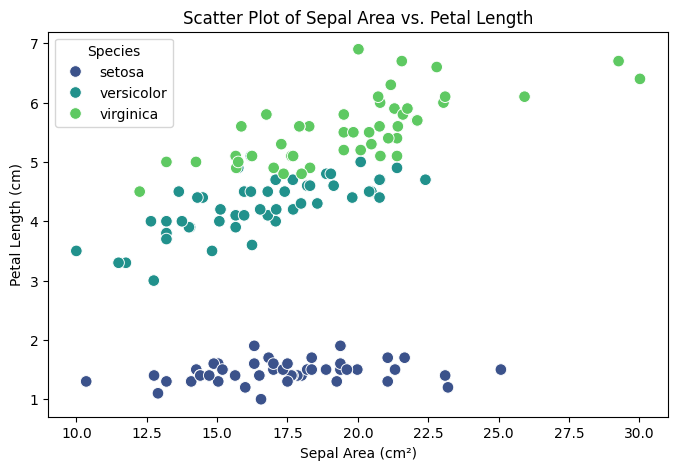

In [7]:
# Create a scatter plot for Sepal Area vs. Petal Length
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='sepal area', 
    y='petal length (cm)', 
    hue='species', 
    data=iris_df, 
    palette='viridis', 
    s=70
)
plt.title('Scatter Plot of Sepal Area vs. Petal Length')
plt.xlabel('Sepal Area (cm²)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()


/var/folders/j0/w_sc6_7n777fy7v8ytm1r08w0000gn/T/ipykernel_25141/1457139123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


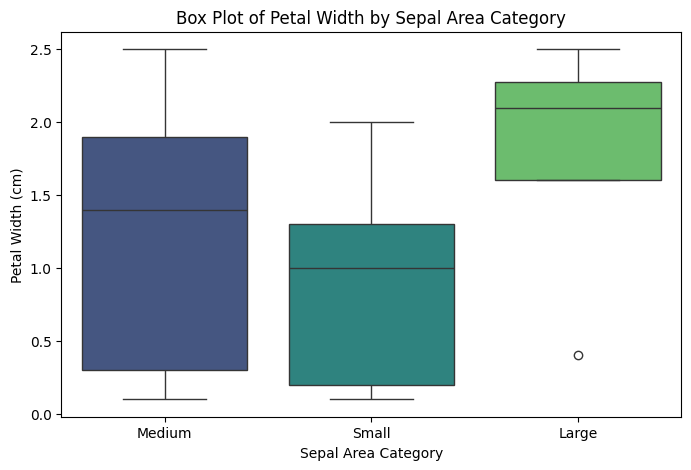

In [8]:
# Create a box plot for Petal Width by Sepal Area Category
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='sepal area category', 
    y='petal width (cm)', 
    data=iris_df, 
    palette='viridis'
)
plt.title('Box Plot of Petal Width by Sepal Area Category')
plt.xlabel('Sepal Area Category')
plt.ylabel('Petal Width (cm)')
plt.show()


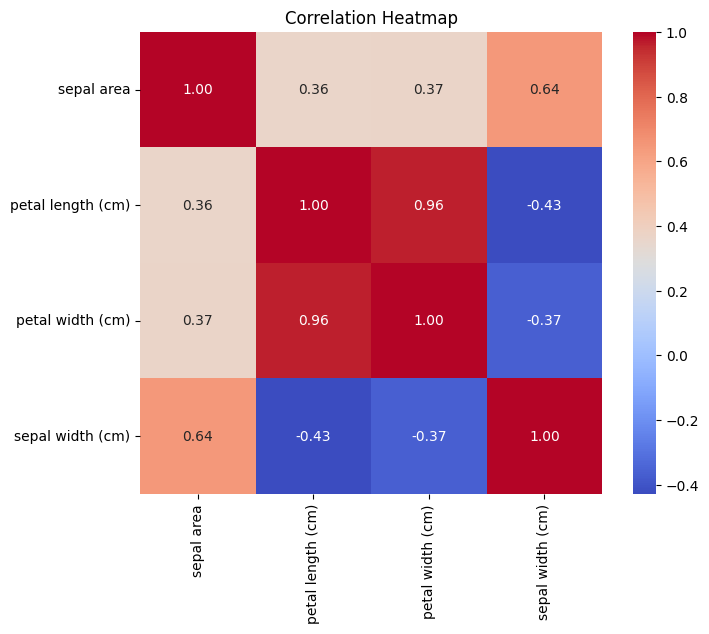

In [9]:
# Calculate the correlation matrix for relevant features
correlation_matrix = iris_df[['sepal area', 'petal length (cm)', 'petal width (cm)', 'sepal width (cm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()
